In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [0]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
X_train = pd.read_csv('/content/drive/My Drive/Ride_Fare/train.csv',index_col='tripid',)

In [4]:
X_train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct
213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct
213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct


In [5]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16974 non-null  float64
 1   duration                   16974 non-null  float64
 2   meter_waiting              16974 non-null  float64
 3   meter_waiting_fare         16974 non-null  float64
 4   meter_waiting_till_pickup  16974 non-null  float64
 5   pickup_time                17176 non-null  object 
 6   drop_time                  17176 non-null  object 
 7   pick_lat                   17176 non-null  float64
 8   pick_lon                   17176 non-null  float64
 9   drop_lat                   17176 non-null  float64
 10  drop_lon                   17176 non-null  float64
 11  fare                       17039 non-null  float64
 12  label                      17176 non-null  object 
dtypes: float64(10), object(3)
memory u

In [0]:
X_train['label'] = X_train['label'].replace({'correct':1 , 'incorrect':0})

In [0]:
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(pick_lon,pick_lat,drop_lon,drop_lat):
    lon1 = pick_lon
    lat1 = pick_lat
    lon2 =drop_lon
    lat2 = drop_lat

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c

    return km

In [0]:
########### distance harvesian

num_rows=X_train.shape[0]
distance_list = []

for i in range(num_rows):
  pick_lon = X_train.iloc[i]['pick_lon'] 
  pick_lat = X_train.iloc[i]['pick_lat'] 
  drop_lon =  X_train.iloc[i]['drop_lon']
  drop_lat =  X_train.iloc[i]['drop_lat']
  dist = haversine(pick_lon,pick_lat,drop_lon,drop_lat)
  distance_list.append(dist)


X_train['distance'] = distance_list



In [0]:
X_train.drop('drop_lat',axis = 1,inplace=True)
X_train.drop('drop_lon',axis = 1,inplace=True)


VISUALIZE SOME PATTERNS IN CORRECT AND INCORRECT ROWS

In [0]:
inc = X_train[X_train.label == 0]
c = X_train[X_train.label == 1]

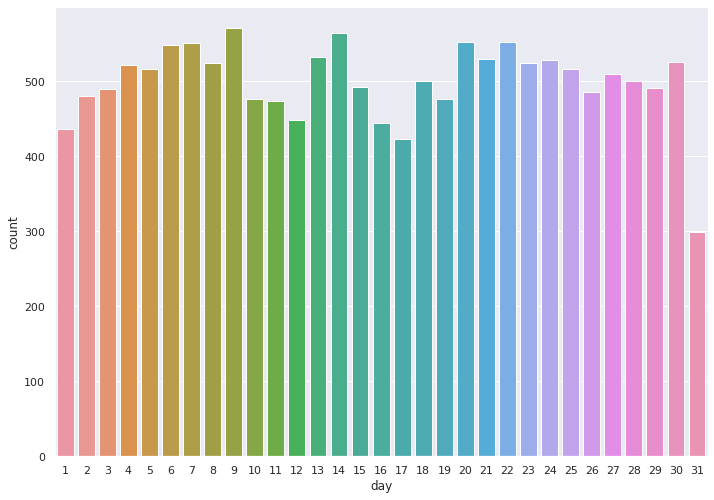

In [0]:
import seaborn as sns
sns.set(style="darkgrid")

ax = sns.countplot(x="day", data=c)

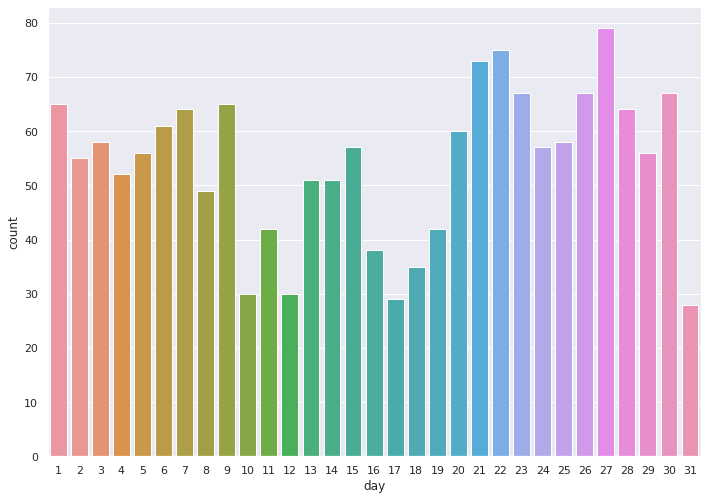

In [0]:
import seaborn as sns
sns.set(style="darkgrid")

ax = sns.countplot(x="day", data=inc)

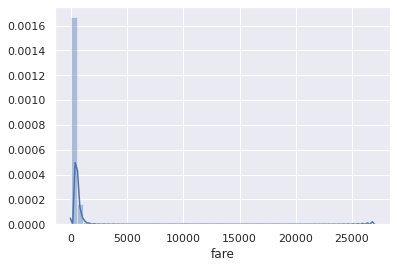

In [28]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure() 
sns.distplot(c['fare'])


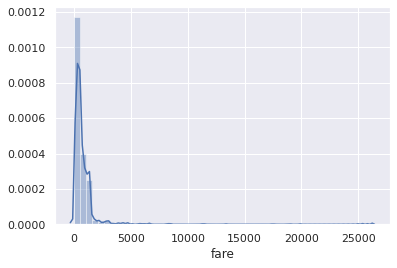

In [29]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure() 
sns.distplot(inc['fare'])

incorrect fares have a comparatively high density of fares around 1000-1500 

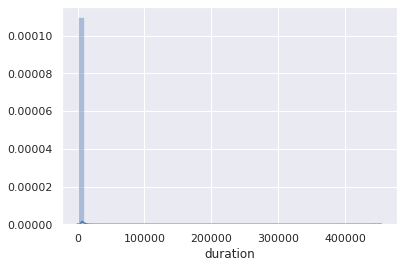

In [30]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure() 
sns.distplot(c['duration'])


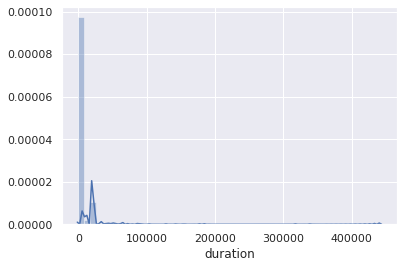

In [31]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure() 
sns.distplot(inc['duration'])

incorrect fares have a comparatively high density of fares around 20000 

BINARIZE DAYS TO GET THE PATTERN

In [0]:
########### day

num_rows=X_train.shape[0]
day_list = []

for i in range(num_rows):
  pick_time = X_train.iloc[i]['pickup_time'] 
  day = datetime.strptime(pick_time,'%m/%d/%Y %H:%M').day
  day_list.append(day)

X_train['day'] = day_list


In [0]:
bins = [0,9,20,32]
labels = [0,1,2]
X_train['binned_day'] = pd.cut(X_train['day'], bins=bins, labels=labels)

In [0]:
X_train = X_train.join(pd.get_dummies(X_train['binned_day'],prefix=X_train['binned_day'].name))

In [0]:
X_train.drop('day',axis = 1,inplace=True)
X_train.drop('binned_day',axis = 1,inplace=True)


In [0]:
X_train.drop('drop_time',axis = 1,inplace=True)
X_train.drop('pickup_time',axis = 1,inplace=True)

FILL SOME NULLS SELECTIVELY

In [0]:
X_train['fare']  = X_train['fare'].fillna(1250)

In [0]:
li = []
for i, row in X_train.iterrows():
  if row.label == 0:
    if pd.isnull(row.duration) :
      li.append(21000)
    else:
      li.append(row.duration)  
  else:
    if pd.isnull(row.duration) :
      li.append(5000)
    else:
      li.append(row.duration)  

In [0]:
X_train['duration']  = li

FEATURE CROSSES

In [0]:
#### time/fare
num_rows=X_train.shape[0]
avg_fare_list = []
for i in range(num_rows):
  if X_train.iloc[i]['fare'] == 0:
    avg_fare = 0
  else:
    avg_fare = (X_train.iloc[i]['duration'] - X_train.iloc[i]['meter_waiting'])/ (X_train.iloc[i]['fare'])
  
  avg_fare_list.append(avg_fare)
  
X_train['avg_fare'] = avg_fare_list


In [0]:
##### distance / duration

num_rows=X_train.shape[0]
speed_list = []
for i in range(num_rows):
  if ( X_train.iloc[i]['duration']- X_train.iloc[i]['meter_waiting']) <= 0:
    speed = -10
  else:
    speed = X_train.iloc[i]['distance'] /( X_train.iloc[i]['duration']- X_train.iloc[i]['meter_waiting'])
  
  speed_list.append(speed)
  
X_train['speed'] = speed_list


In [0]:
##### distance / fare

num_rows=X_train.shape[0]
avg_fare_list = []
for i in range(num_rows):
  if X_train.iloc[i]['fare'] == 0:
    avg_fare = 0
  else:
    avg_fare = X_train.iloc[i]['distance'] / X_train.iloc[i]['fare']
  
  avg_fare_list.append(avg_fare)
  
X_train['avg_dist_fare'] = avg_fare_list

FILL THE REMAINING NULLS 

In [0]:
X_train.fillna(-10,inplace=True)

XGBOOST

In [0]:
!pip install xgboost

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
Y = X_train['label']
X = X_train.drop('label',axis=1)

In [24]:
!pip install shap

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394109 sha256=92ab7e06b27356616fce0e28219ad2dda12ee4e4155ac5a8816d74ddb9895055
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


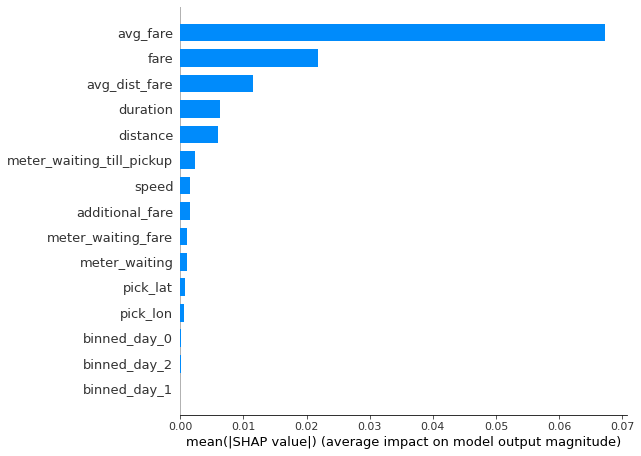

In [25]:
import xgboost
import shap
# load JS visualization code to notebook
shap.initjs()
# train XGBoost model
X,y = X,Y
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

GRIDSEARCH CV FOR FINDING BEST PARAMS

In [0]:
from sklearn.model_selection import GridSearchCV


In [0]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42,
    
)

In [0]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 1000, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [0]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'f1',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [0]:
grid_search.fit(X, Y)


Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   28.6s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  8.4min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed: 26.9min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed: 62.1min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed: 130.7min


In [0]:
# best params_
'''
base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=380, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1
'''

PREPARE TRAIN/TEST 

In [0]:
X.reset_index(drop=True, inplace=True)

In [0]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed,shuffle=True)

In [34]:
# fit model no training data
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedBaggingClassifier

#model = XGBClassifier(n_estimators=450,max_depth=40,random_state=1,objective= 'binary:logistic',)
model  = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=380, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

model.fit(X_train, y_train)

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble i

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=380, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [0]:
# make predictions for test data
predictions = model.predict(X_test)


In [36]:
# evaluate predictions

from sklearn.metrics import f1_score

f1 = f1_score(y_test, predictions, average='macro')
f1

0.8789261045729408

In [37]:
y_test.value_counts()

1    5131
0     540
Name: label, dtype: int64

In [38]:
confusion_matrix(y_test, predictions)

array([[ 388,  152],
       [  68, 5063]])

FINAL MODEL WITH ALL TRAIN DATA

In [39]:
new_model = XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

new_model.fit(X, Y)

XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

TEST DATA PREPARATION FOR PREDICTION

In [0]:
test_df = pd.read_csv('/content/drive/My Drive/Ride_Fare/test.csv',index_col="tripid")

In [41]:
test_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
tripid,,,,,,,,,,,,
213284604,10.5,924,42,2.44860,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
213286352,10.5,4249,20,0.00000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
213293973,10.5,1552,255,2.65880,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
213294622,10.5,462,16,0.00000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
213298687,10.5,814,392,12.36920,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723,429,24.83332,3,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48
222857785,10.5,1378,80,0.00000,125,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85
222858416,10.5,418,56,3.28440,93,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79


In [0]:
########### distance harvesian

num_rows=test_df.shape[0]
distance_list = []

for i in range(num_rows):
  pick_lon = test_df.iloc[i]['pick_lon'] 
  pick_lat = test_df.iloc[i]['pick_lat'] 
  drop_lon =  test_df.iloc[i]['drop_lon']
  drop_lat =  test_df.iloc[i]['drop_lat']
  dist = haversine(pick_lon,pick_lat,drop_lon,drop_lat)
  distance_list.append(dist)

test_df['distance'] = distance_list


In [0]:
test_df.drop('drop_lat',axis = 1,inplace=True)
test_df.drop('drop_lon',axis = 1,inplace=True)


In [0]:
########### day

num_rows=test_df.shape[0]
day_list = []

for i in range(num_rows):
  pick_time = test_df.iloc[i]['pickup_time'] 
  day = datetime.strptime(pick_time,'%m/%d/%Y %H:%M').day
  day_list.append(day)

test_df['day'] = day_list


In [0]:
bins = [0,9,20,32]
labels = [0,1,2]
test_df['binned_day'] = pd.cut(test_df['day'], bins=bins, labels=labels)

In [0]:
test_df = test_df.join(pd.get_dummies(test_df['binned_day'],prefix=test_df['binned_day'].name))

In [0]:
test_df.drop('day',axis = 1,inplace=True)
test_df.drop('binned_day',axis = 1,inplace=True)


In [0]:
test_df.drop('drop_time',axis = 1,inplace=True)
test_df.drop('pickup_time',axis = 1,inplace=True)

In [0]:
######## feature crosses

In [0]:
#### time/fare
num_rows=test_df.shape[0]
avg_fare_list = []
for i in range(num_rows):
  if test_df.iloc[i]['fare'] == 0:
    avg_fare = 0
  else:
    avg_fare = (test_df.iloc[i]['duration'] - test_df.iloc[i]['meter_waiting'])/ (test_df.iloc[i]['fare'])
  
  avg_fare_list.append(avg_fare)
  
test_df['avg_fare'] = avg_fare_list


In [0]:
##### distance / duration

num_rows=test_df.shape[0]
speed_list = []
for i in range(num_rows):
  if ( test_df.iloc[i]['duration']- test_df.iloc[i]['meter_waiting']) <= 0:
    speed = -10
  else:
    speed = test_df.iloc[i]['distance'] /( test_df.iloc[i]['duration']- test_df.iloc[i]['meter_waiting'])
  
  speed_list.append(speed)
  
test_df['speed'] = speed_list


In [0]:
##### distance / fare

num_rows=test_df.shape[0]
avg_fare_list = []
for i in range(num_rows):
  if test_df.iloc[i]['fare'] == 0:
    avg_fare = 0
  else:
    avg_fare = test_df.iloc[i]['distance'] / test_df.iloc[i]['fare']
  
  avg_fare_list.append(avg_fare)
  
test_df['avg_dist_fare'] = avg_fare_list

PREDICT USING FINAL MODEL

In [0]:
### NN
test_preds = new_model.predict(test_df)

In [65]:
test_preds

array([1, 1, 1, ..., 1, 1, 1])

In [66]:
submission_df = pd.read_csv('/content/drive/My Drive/Ride_Fare/sample_submission.csv',index_col="tripid")
submission_df.head()

,prediction
tripid,
213284604,1
213286352,0
213293973,0
213294622,1
213298687,1


In [67]:
# Save predictions to submission data frame
submission_df["prediction"] = test_preds

submission_df.head()

,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1


In [0]:
# 1_1 clas wight, H= all data, L = part
submission_df.to_csv('/content/drive/My Drive/Ride_Fare/ride_fare_submission_xgb_456z_more.csv', index=True)

In [69]:
submission_df['prediction'].value_counts()

1    8120
0     456
Name: prediction, dtype: int64